In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
mnist_train = pd.read_csv("D:/datascience/fashion-mnist_train.csv/fashion-mnist_train.csv") 
mnist_test = pd.read_csv("D:/datascience/fashion-mnist_test.csv/fashion-mnist_test.csv")  

<font size="5">*Nous possédons une Dataset de 60000 images pour le training et 10000 pour le test*</font>

In [3]:
print(mnist_train.shape)
print(mnist_test.shape)

(60000, 785)
(10000, 785)


<font size="5">*Afin de computer rapidement nos solution nous prendront seulment 10000 images de notre dataset train </font>

In [3]:
mnist_train_bis=mnist_train[:10000]
mnist_test_bis=mnist_test[:100000]

<font size="5">*on visualise les 15 prémière ligne de notre dataset on constate que les labels sont déjà mélangés* </font>

In [6]:
mnist_train.head(15)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


<font size="5">*Simple ligne de code pour crée un jeu dataframe avec label uniquement et un autre sans la colonne label*</font>

In [4]:
x_train = mnist_train_bis.drop('label', axis=1)  
y_train=mnist_train_bis['label']

In [5]:
x_test = mnist_test_bis.drop('label', axis=1)  
y_test=mnist_test_bis['label']

<font size="5">*On commencera seulment par changer le noyaux au debut de l expériance*</font> 

<font size="5">*Les algorithmes SVM utilisent un ensemble de fonctions mathématiques définies en tant que noyau. La fonction du noyau est de prendre les données en entrée et de les transformer dans la forme requise. Différents algorithmes SVM utilisent différents types de fonctions du noyau. Ces fonctions peuvent être de types différents. Par exemple, une fonction de base radiale (RBF), linéaire, non linéaire, polynomiale et sigmoïde.
Introduisez les fonctions du noyau pour les données de séquence, les graphiques, le texte, les images, ainsi que les vecteurs. Le type de fonction du noyau le plus utilisé est RBF. Parce qu'il a une réponse localisée et finie sur tout l'axe des x.
Les fonctions du noyau renvoient le produit interne entre deux points dans un espace de fonctions approprié. Ainsi, en définissant une notion de similarité, avec un faible coût en calcul, même dans des espaces high-dimensional.*</font>

<font size="5">*LINEAR KERNEL :*</font>

<font size="5">*Le noyau linéaire est utilisé lorsque les données sont séparables linéairement, c'est-à-dire qu'elles peuvent être séparées en utilisant une seule ligne. C'est l'un des noyaux les plus utilisés. Il est principalement utilisé quand il y a un grand nombre de fonctionnalités dans un ensemble de données particulier.*</font>

In [9]:

#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='linear', C=1,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
#Predict Output
predicted= model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

1.0
[[779   7  17  35   5   1 136   1  18   1]
 [  2 974   2  18   1   1   1   0   1   0]
 [ 47   5 728  16  97   0 102   0   5   0]
 [ 85  37  13 794  34   0  34   0   3   0]
 [  6   1 187  37 674   0  93   0   2   0]
 [  2   0   0   0   0 898   0  58   5  37]
 [205   3 138  46 106   0 482   0  20   0]
 [  0   0   0   0   0  60   0 897   0  43]
 [ 14   1   7   4   5   8  18   5 938   0]
 [  0   0   0   0   0  19   0  49   0 932]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1000
           1       0.95      0.97      0.96      1000
           2       0.67      0.73      0.70      1000
           3       0.84      0.79      0.81      1000
           4       0.73      0.67      0.70      1000
           5       0.91      0.90      0.90      1000
           6       0.56      0.48      0.52      1000
           7       0.89      0.90      0.89      1000
           8       0.95      0.94      0.94      1000
           9       0.92 

<font size="5">*POLY KERNEL :*</font>

<font size="5">*Ici, notre noyau induit jusqu'à un certain degré l'espace de combinaisons polynomiales de nos caractéristiques*</font>

<font size="5">*Populaire parmi les classifications d'images voici l'équation ou d est le nombre de degrés*</font>

![title](pic1.png)

In [10]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='poly', C=1,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
#Predict Output
predicted= model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.8982
[[790   2  12  18   0  46 114   0  18   0]
 [  6 958   5  17   0  10   4   0   0   0]
 [ 19   0 694   9  84  34 151   0   9   0]
 [ 35  11   9 863  24  27  30   0   1   0]
 [  1   1  79  36 736  16 127   0   4   0]
 [  0   0   0   0   0 936   0  38   4  22]
 [142   3  67  19  59  57 638   0  14   1]
 [  0   0   0   0   0 130   0 830   0  40]
 [  5   0   6   4   1  34  17   7 922   4]
 [  0   0   0   0   0  37   0  46   0 917]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1000
           1       0.98      0.96      0.97      1000
           2       0.80      0.69      0.74      1000
           3       0.89      0.86      0.88      1000
           4       0.81      0.74      0.77      1000
           5       0.71      0.94      0.80      1000
           6       0.59      0.64      0.61      1000
           7       0.90      0.83      0.86      1000
           8       0.95      0.92      0.94      1000
           9       0.

<font size="5">*RBF KERNEL :*</font>

<font size="5">*Ici, notre espace induit est un espace de distributions gaussiennes ... chaque point devient une fonction de densité de probabilité (jusqu'à la mise à l'échelle) d'une distribution normale. Dans un tel espace, les produits scalaires sont des intégrales (car nous avons un nombre infini de dimensions!) Et par conséquent, nous avons une flexibilité extrême*</font>

<font size="5">*C'est un noyau polyvalent; utilisé quand il n'y a aucune connaissance préalable sur les données*</font>

![title](pic2.png)

In [11]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=1,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
#Predict Output
predicted= model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.8992
[[829   0   8  45   1   2 101   0  14   0]
 [  3 962   7  20   0   1   7   0   0   0]
 [ 11   0 766  11 120   0  85   0   7   0]
 [ 29   6  11 905  21   0  25   0   3   0]
 [  1   0  61  36 830   0  69   0   3   0]
 [  1   0   0   1   0 921   1  49   4  23]
 [196   0  92  39  74   0 587   0  12   0]
 [  0   0   0   0   0  33   0 902   0  65]
 [  3   0   3   4   1   4  16   2 964   3]
 [  0   0   0   0   0  12   0  40   0 948]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.81      0.77      0.79      1000
           3       0.85      0.91      0.88      1000
           4       0.79      0.83      0.81      1000
           5       0.95      0.92      0.93      1000
           6       0.66      0.59      0.62      1000
           7       0.91      0.90      0.91      1000
           8       0.96      0.96      0.96      1000
           9       0.

<font size="5">*SIGMOID KERNEL :*</font>

<font size="5">*Nous pouvons l'utiliser comme proxy pour les réseaux de neurones. L'équation est :*</font>

![title](pic3.png)

In [12]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='sigmoid', C=1,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
#Predict Output
predicted= model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.3651
[[584   2   0  12 397   3   1   0   1   0]
 [ 54 699   0  12 235   0   0   0   0   0]
 [429   1  29   0 485   0  54   0   2   0]
 [268 108   0 229 395   0   0   0   0   0]
 [569   7  28   4 322   0  69   0   1   0]
 [  3   1   0   0 298 534   1  80  69  14]
 [385   3   8   3 553   0  48   0   0   0]
 [  0   0   0   0  99 154   0 637  48  62]
 [ 84   0 109   6 491 161  32   0 117   0]
 [ 11   0  29   1 160 306   9  13  33 438]]
              precision    recall  f1-score   support

           0       0.24      0.58      0.34      1000
           1       0.85      0.70      0.77      1000
           2       0.14      0.03      0.05      1000
           3       0.86      0.23      0.36      1000
           4       0.09      0.32      0.15      1000
           5       0.46      0.53      0.49      1000
           6       0.22      0.05      0.08      1000
           7       0.87      0.64      0.74      1000
           8       0.43      0.12      0.18      1000
           9       0.

<font size="5">*Pourquoi le noyau RBF surpasse-t-il généralement les noyaux linéaires ou polynomiaux?*</font>

<font size="5">* La règle de base est donc la suivante: utilisez des SVM linéaires (ou une régression logistique) pour les problèmes linéaires, et des noyaux non linéaires tels que le noyau à fonction de base radiale pour les problèmes non linéaires.

La région de décision SVM du noyau RBF est également une région de décision linéaire. En réalité, le noyau SVM du noyau RBF crée des combinaisons non linéaires de vos fonctions pour élever vos échantillons dans un espace de fonctions de plus grande dimension dans lequel vous pouvez utiliser une limite de décision linéaire pour séparer vos classes:*</font>

 <font size="5">*Selon la CPA nous voyant bien que le problème est non linéaire et que la séparation se fera avec une fonction polynomiale ou Rbf*</font>

<font size="5">*On ne se  soucierait pas trop du noyau polynomial. En pratique, il est moins utile pour des raisons de performances liées à l’efficacité (calcul et prédictives).
nous pensons que les bonnes raisons d’utiliser le noyau RBF sont qu’elles fonctionnent bien et qu’elles sont relativement faciles à calibrer, contrairement aux autres noyaux.
Le noyau polynomial a trois paramètres (décalage, mise à l'échelle, degré). Le noyau RBF a un paramètre*</font>

<font size="5">*Remarque : Cela ne signifie pas que RBF sera meixu dans tous les cas nous soulignons juste une des raison qui font que RBF marche mieux dans notre cas*</font>

<font size="5">*Paramétre C :*</font>

<font size="5">*Le paramètre C indique à l'optimisation SVM à quel point vous voulez éviter de classer chaque exemple d'apprentissage de manière erronée. Pour les grandes valeurs de C, l'optimisation choisira un hyperplan à plus faible marge si cet hyperplan réussit mieux à classer correctement tous les points d'apprentissage. Inversement, une très petite valeur de C obligera l'optimiseur à rechercher un hyperplan de séparation à marge plus grande, même si cet hyperplan classe de manière erronée un plus grand nombre de points. Pour de très petites valeurs de C, vous devriez obtenir des exemples mal classés, souvent même si vos données d'entraînement sont séparables linéairement.*</font>

![title](c.jpg)

<font size="5">*De manière générale il n'y a pas de réponse miracle tout dépend de la dataset le mieux et d'essayer différentes valeurs et voit ce que ça donne*</font>

In [13]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=0.5,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
#Predict Output
predicted= model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.8709
[[815   0   9  64   0   4  94   0  14   0]
 [  6 952  12  23   0   1   6   0   0   0]
 [ 11   0 724  12 146   0  96   0  11   0]
 [ 25   7   7 909  20   0  30   0   2   0]
 [  1   0  62  41 804   0  88   0   4   0]
 [  1   0   0   1   0 916   1  50   4  27]
 [218   0  93  42  70   0 563   0  14   0]
 [  0   0   0   0   0  37   0 882   0  81]
 [  1   0   4   4   2  10  22   2 952   3]
 [  0   0   0   0   0  15   0  44   0 941]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1000
           1       0.99      0.95      0.97      1000
           2       0.79      0.72      0.76      1000
           3       0.83      0.91      0.87      1000
           4       0.77      0.80      0.79      1000
           5       0.93      0.92      0.92      1000
           6       0.63      0.56      0.59      1000
           7       0.90      0.88      0.89      1000
           8       0.95      0.95      0.95      1000
           9       0.

In [14]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=2,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
#Predict Output
predicted= model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.9289
[[830   0   8  40   1   2 105   0  14   0]
 [  5 971   3  16   0   1   4   0   0   0]
 [ 15   0 783  12 107   0  79   0   4   0]
 [ 29   7  11 907  23   0  20   0   3   0]
 [  1   0  64  33 838   0  61   0   3   0]
 [  1   0   0   1   0 923   1  50   4  20]
 [175   1  87  31  70   0 623   0  13   0]
 [  0   0   0   0   0  29   0 917   0  54]
 [  4   0   3   4   1   3  14   4 965   2]
 [  0   0   0   0   0  14   0  40   0 946]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.78      0.80      1000
           3       0.87      0.91      0.89      1000
           4       0.81      0.84      0.82      1000
           5       0.95      0.92      0.94      1000
           6       0.69      0.62      0.65      1000
           7       0.91      0.92      0.91      1000
           8       0.96      0.96      0.96      1000
           9       0.

In [18]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=0.001,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
#Predict Output
predicted= model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.1037
[[   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]
 [   0    0    0    0    0    0    0 1000    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.10      

C:\Users\Nazim\Anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=5,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
#Predict Output
predicted= model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.9672
[[831   1  10  31   0   2 111   0  14   0]
 [  4 974   3  14   0   1   4   0   0   0]
 [ 18   2 791  14  90   0  83   0   2   0]
 [ 32   9  12 904  25   0  16   0   2   0]
 [  1   0  67  31 836   0  63   0   2   0]
 [  0   0   0   1   0 927   1  51   3  17]
 [161   0  83  25  72   0 648   0  11   0]
 [  0   0   0   0   0  17   0 940   0  43]
 [  4   0   5   4   1   4  11   4 966   1]
 [  0   0   0   0   0   9   0  41   0 950]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.79      0.80      1000
           3       0.88      0.90      0.89      1000
           4       0.82      0.84      0.83      1000
           5       0.97      0.93      0.95      1000
           6       0.69      0.65      0.67      1000
           7       0.91      0.94      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.

In [22]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=8.5,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
#Predict Output
predicted= model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.983
[[827   1  11  29   1   2 115   0  14   0]
 [  4 976   1  14   1   0   4   0   0   0]
 [ 22   3 791  13  89   0  79   0   3   0]
 [ 35  10  12 890  32   0  18   0   3   0]
 [  1   0  72  30 835   0  60   0   2   0]
 [  0   0   0   1   0 928   1  48   3  19]
 [160   0  88  25  64   0 653   0  10   0]
 [  0   0   0   0   0  20   0 938   0  42]
 [  7   0   5   4   1   4  11   4 963   1]
 [  1   0   0   0   0   9   0  35   0 955]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.79      0.80      1000
           3       0.88      0.89      0.89      1000
           4       0.82      0.83      0.83      1000
           5       0.96      0.93      0.95      1000
           6       0.69      0.65      0.67      1000
           7       0.92      0.94      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.9

In [23]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=3,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
#Predict Output
predicted= model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.955
[[831   0   9  33   0   2 111   0  14   0]
 [  5 973   3  14   0   1   4   0   0   0]
 [ 17   0 788  13  99   0  80   0   3   0]
 [ 29   9  10 909  23   0  17   0   3   0]
 [  1   0  66  34 837   0  60   0   2   0]
 [  0   0   0   1   0 928   1  50   4  16]
 [161   1  86  28  70   0 643   0  11   0]
 [  0   0   0   0   0  20   0 934   0  46]
 [  4   0   4   4   1   3  12   4 967   1]
 [  0   0   0   0   0  11   0  39   0 950]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.79      0.80      1000
           3       0.88      0.91      0.89      1000
           4       0.81      0.84      0.82      1000
           5       0.96      0.93      0.94      1000
           6       0.69      0.64      0.67      1000
           7       0.91      0.93      0.92      1000
           8       0.96      0.97      0.97      1000
           9       0.9

<font size="5">*On peut conclure à partire de ces test que le C ne doit être ni trop grand (plus de 5 on ne gagne plus rien en terme d'accuracy) ni trop petit (0.001 donne des résultats trés mauvais)*</font>

<font size="5">*Valeur idéal est 3 vue que au delà l'accuracy n'augmente pas*</font>

<font size="5">*Pour finir on aimerais citer un papier qui s'intitule "An Automatic Method for Selecting the Parameter of the Normalized Kernel Function to Support Vector Machines"*</font>

<font size="5">*Comme l'article l'indique l'équipe de recherche a mis au point une méthode pour trouver le C*</font>

<font size="5">*Le principe est le suivant*</font>

<font size="5">*Les valeurs de la fonction du kernel RBF devraient être proche de 1 si l'échantillon appartient à la même classe*</font>

![title](met1.png)

<font size="5">*Les valeurs de la fonction du kernel RBF devraient être proche de 0 si l'échantillon n'appartient pas à la même classe*</font>

![title](met2.png")

<font size="5">*ils ont prit en compte 2 critére*</font>

<font size="5">*moyenne des valeurs appliquées par la fonction normale du noyau sur les échantillons de la même classe:*</font>

![title](met4.png)

<font size="5">*moyenne des valeurs appliquées par la fonction du noyau normalisée sur les échantillons des différentes classes*</font>

![title](met3.png)

In [33]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [23]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=3,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
#Predict Output
predicted= model.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.9479
[[830   0   9  34   0   2 112   0  13   0]
 [  5 972   3  15   0   1   4   0   0   0]
 [ 18   0 790  13  97   0  79   0   3   0]
 [ 29   9  11 906  23   0  19   0   3   0]
 [  1   0  66  33 839   0  59   0   2   0]
 [  1   0   0   1   0 927   1  50   4  16]
 [164   1  86  28  71   0 638   0  12   0]
 [  0   0   0   0   0  22   0 930   0  48]
 [  4   0   3   4   1   3  13   3 967   2]
 [  0   0   0   0   0  12   0  39   0 949]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.79      0.80      1000
           3       0.88      0.91      0.89      1000
           4       0.81      0.84      0.83      1000
           5       0.96      0.93      0.94      1000
           6       0.69      0.64      0.66      1000
           7       0.91      0.93      0.92      1000
           8       0.96      0.97      0.97      1000
           9       0.

In [136]:
X=mnist_train_bis.values
X1=mnist_test_bis.values
y=y_train.values

In [131]:
X= mnist_train_bis2[:, :2]


In [44]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

  <font size="5">*Visualization de quelques points *</font>

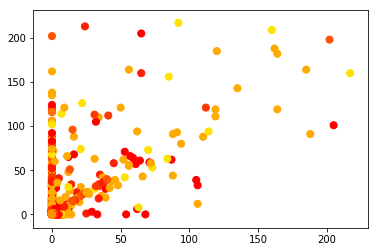

In [146]:
for i in range(0,7):
        plt.scatter(X[:, i], X[:, i+1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

  <font size="5">*Passons aux données encodées*</font>

In [13]:
from data import get_encoded_data

Using TensorFlow backend.


In [50]:
(x_train_encoded, y_train), (x_test_encoded, y_test) = get_encoded_data()

C:\Users\Nazim\Anaconda3\envs\myenv\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [51]:
x_train_encoded=x_train_encoded[:10000]
y_train=y_train[:10000]

 <font size="+2">*on utilise les 4 kernel avec un C=1 et enfin on prend le meilleur kernel(rbf) avec le meilleur C, ce qui nous donne un total de 5 tests à réaliser*</font>

In [26]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=3,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train_encoded, y_train)
print(model.score(x_train_encoded, y_train))
#Predict Output
predicted= model.predict(x_test_encoded)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.86085
[[824   4   9  50   5   0  96   0  12   0]
 [  5 953   7  26   4   0   4   0   1   0]
 [ 11   2 750  15 126   0  95   0   1   0]
 [ 37   8   8 874  30   0  40   0   3   0]
 [  0   1 111  39 765   0  82   0   2   0]
 [  0   0   0   1   0 916   0  48   6  29]
 [180   3 125  32 115   0 525   0  20   0]
 [  0   0   0   0   0  24   0 928   0  48]
 [  1   1   0   6   4   3   8   2 974   1]
 [  0   0   0   0   0  14   0  49   1 936]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.74      0.75      0.75      1000
           3       0.84      0.87      0.86      1000
           4       0.73      0.77      0.75      1000
           5       0.96      0.92      0.94      1000
           6       0.62      0.53      0.57      1000
           7       0.90      0.93      0.92      1000
           8       0.95      0.97      0.96      1000
           9       0

In [13]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='poly', C=1,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train_encoded, y_train)
print(model.score(x_train_encoded, y_train))
#Predict Output
predicted= model.predict(x_test_encoded)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.8226
[[762   2  17  33   1   1 175   0   9   0]
 [ 10 911  14  26   2   0  37   0   0   0]
 [  8   0 736   9  71   0 168   0   8   0]
 [ 38   9  13 787  29   0 122   0   1   1]
 [  0   2 218  38 562   0 176   0   4   0]
 [  1   0   1   0   0 886   9  58  13  32]
 [152   2 127  20  70   0 613   0  16   0]
 [  0   0   0   0   0  20   6 929   4  41]
 [  2   1   3   6   4   1  94   4 884   1]
 [  0   0   0   0   0  20   9  65   5 901]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1000
           1       0.98      0.91      0.95      1000
           2       0.65      0.74      0.69      1000
           3       0.86      0.79      0.82      1000
           4       0.76      0.56      0.65      1000
           5       0.95      0.89      0.92      1000
           6       0.44      0.61      0.51      1000
           7       0.88      0.93      0.90      1000
           8       0.94      0.88      0.91      1000
           9       0.

In [27]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='linear', C=1,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train_encoded, y_train)
print(model.score(x_train_encoded, y_train))
#Predict Output
predicted= model.predict(x_test_encoded)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.8347833333333333
[[835   4  10  54   6   1  75   0  15   0]
 [  4 950   8  28   3   0   6   0   1   0]
 [  9   1 714  16 138   0 118   0   4   0]
 [ 42  12   7 864  31   0  40   0   4   0]
 [  0   2 135  45 717   0  98   0   3   0]
 [  0   0   0   1   0 907   0  53   6  33]
 [239   2 131  35 125   0 449   0  19   0]
 [  0   0   0   0   0  33   0 920   0  47]
 [  4   1   3   6   7   2  14   2 959   2]
 [  0   0   0   0   0  22   0  62   1 915]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1000
           1       0.98      0.95      0.96      1000
           2       0.71      0.71      0.71      1000
           3       0.82      0.86      0.84      1000
           4       0.70      0.72      0.71      1000
           5       0.94      0.91      0.92      1000
           6       0.56      0.45      0.50      1000
           7       0.89      0.92      0.90      1000
           8       0.95      0.96      0.95      1000
         

In [16]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='sigmoid', C=1,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train_encoded, y_train)
print(model.score(x_train_encoded, y_train))
#Predict Output
predicted= model.predict(x_test_encoded)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.3286
[[395  46   6  87  11 319 124   0  12   0]
 [ 74 590   5  32   4 288   4   0   3   0]
 [ 41  12 271   6 300 309  42   0  13   6]
 [ 69 389   1 240  10 269  13   0   5   4]
 [ 30  67 201  42 384 188   5   0  73  10]
 [  7 259   1   0   9 458 152  95  14   5]
 [120  39 135  40 156 402  65   0  30  13]
 [ 14  97   0   0   0 541   0 337   0  11]
 [  8  30   3   8  79 545  20  39 262   6]
 [  0  11   0   1  20 391  16 255  50 256]]
              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1000
           1       0.38      0.59      0.46      1000
           2       0.43      0.27      0.33      1000
           3       0.53      0.24      0.33      1000
           4       0.39      0.38      0.39      1000
           5       0.12      0.46      0.19      1000
           6       0.15      0.07      0.09      1000
           7       0.46      0.34      0.39      1000
           8       0.57      0.26      0.36      1000
           9       0.

In [25]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC(kernel='rbf', C=1,gamma='scale') 
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train_encoded, y_train)
print(model.score(x_train_encoded, y_train))
#Predict Output
predicted= model.predict(x_test_encoded)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predicted))  
print(classification_report(y_test,predicted))

0.8529
[[824   3  15  52   3   1  91   0  11   0]
 [  7 951   7  26   4   0   4   0   1   0]
 [  9   2 757  15 121   0  94   0   2   0]
 [ 34   9   7 874  28   0  45   0   3   0]
 [  0   1 119  40 744   0  93   0   3   0]
 [  0   0   0   1   0 912   0  51   6  30]
 [195   4 129  33 114   0 507   0  18   0]
 [  0   0   0   0   0  25   0 928   0  47]
 [  0   0   1   6   4   2  12   4 970   1]
 [  0   0   0   0   0  17   0  54   1 928]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.76      0.74      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.74      0.74      1000
           5       0.95      0.91      0.93      1000
           6       0.60      0.51      0.55      1000
           7       0.89      0.93      0.91      1000
           8       0.96      0.97      0.96      1000
           9       0.

 <font size="5">*Comparaison des méthodes et résultats*</font>

 <font size="+2">*D'apés nos résusltats observé ici nous voyant que à chaque fois les données auto encoder donnés de moins bon résultats que les 
    données normal avec  de 3%  d'accuracy au moins pour la sigmoid 2% au moyenne pour les RBF et 2% aussi pour le kernel poly
    on notera aussi une légere amélioration pour le cas du kernel linear mais celà reste marginal*</font>

 <font size="+2">*Cette baisse d'accuracy pourrait être expliqué par tous simplement le fonctionnement d'un auto-encodé, on a la partie encoder dans lequel le modèle apprend à réduire les dimensions en entrée et à compresser les données en entrée en une représentation codée la partit decoder dans lequel le modèle apprend à reconstruire les données à partir de la représentation codée pour les rapprocher le plus possible de l'entrée d'origine et enfin reconstruction Loss C’est la méthode qui mesure le rendement du décodeur et la distance entre la sortie et l’entrée originale.
le fait que les données decoder ne soient pas proches à 100% du dataset original, peut nous laisser penser à une perte d'information qui a pu faire baisse l'accuracy*</font>

  <font size="+2"> *La baisse de 1% à 3% montre que les données decoder sont très proches des originaux, ce qui montre la qualité de notre auto-encoder*</front>


 <font size="+2">*Visualization des donnees encoder resultat différent du précedent avec plus de points printer*</font>

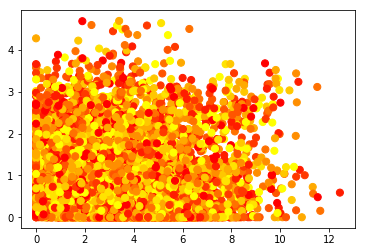

In [56]:
for i in range(0,1):
        plt.scatter(x_train_encoded[:, i], x_train_encoded[:, i+1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [ ]:
<font size="5">**</front>

 <font size="5">*LDA*</font>

<font size="5">*LDA formule des hypothèses simplificatrices sur vos données:*</front>

<font size="5">*Que vos données soient gaussiennes, que chaque variable ait la forme d’une courbe en cloche lorsqu’elle est tracée.*</front>

<font size="5">*Que chaque attribut ait la même variance, que les valeurs de chaque variable varient autour de la moyenne du même montant en moyenne.*</front>

<font size="5">*Avec ces hypothèses, le modèle LDA estime la moyenne et la variance à partir de vos données pour chaque classe. Il est facile d’y penser dans le cas univarié (variable d’entrée simple) avec deux classes.*</front>

<font size="5">*La valeur moyenne (mu) de chaque entrée (x) pour chaque classe (k) peut être estimée de manière normale en divisant la somme des valeurs par le nombre total de valeurs.

muk = 1 / nk * somme (x)*</front>

<font size="5">*Où muk est la valeur moyenne de x pour la classe k, nk est le nombre d'instances de classe k. La variance est calculée pour toutes les classes comme la différence moyenne au carré de chaque valeur par rapport à la moyenne.
sigma^2 = 1 / (n-K) * sum((x – mu)^2)*</front>

<font size="5">*Où sigma ^ 2 est la variance de toutes les entrées (x), n est le nombre d'instances, K est le nombre de classes et mu est la moyenne de l'entrée x.*</front>

<font size="5">*LDA fait des prévisions en estimant la probabilité qu’un nouvel ensemble d’entrées appartient à chaque classe. La classe qui obtient la probabilité la plus élevée est la classe de sortie et une prédiction est faite.*</front>

 <font size="+2">*n_components : nombres de topics, égale a 10 ici*</font>

In [6]:
mnist_train = pd.read_csv("D:/datascience/fashion-mnist_train.csv/fashion-mnist_train.csv") 
mnist_test = pd.read_csv("D:/datascience/fashion-mnist_test.csv/fashion-mnist_test.csv")  

In [7]:
mnist_train_bis=mnist_train[:10000]
mnist_test_bis=mnist_test[:100000]

In [8]:
x_train = mnist_train_bis.drop('label', axis=1)  
y_train=mnist_train_bis['label']

In [9]:
x_test = mnist_test_bis.drop('label', axis=1)  
y_test=mnist_test_bis['label']

In [10]:
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation

In [11]:
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(x_train) 

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

<font size="5">*La perplexité est une mesure de la pertinence d'un modèle de probabilité pour un nouvel ensemble de données. Dans sickit learn, il est simple de s’adapter à la fonction perplexité, qui prend comme argument un modèle de sujet précédemment adapté et un nouvel ensemble de données, et renvoie un nombre unique. Le plus bas, mieux c'est.*</front>

<font size="5">*La vraisemblance est un outil de synthèse des données relatives aux paramètres inconnus.
plus elle est grande mieux c'est*</front>

In [12]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(x_train, y_train))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(x_test))

# See model parameters
print(lda.get_params())


Log Likelihood:  -3449117797.1804185
Perplexity:  444.48319312914316
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': None, 'n_topics': None, 'perp_tol': 0.1, 'random_state': 0, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [40]:
X=mnist_train_bis.values
X1=mnist_test_bis.values
y=y_train.values

 <font size="+2">*Vissualization des donnees*</font>

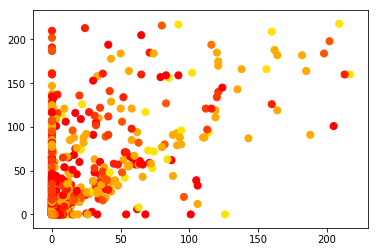

In [47]:
for i in range(0,8):
        plt.scatter(X[:, i], X[:, i+1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

 <font size="+2">*Encoder DATA*</font>

In [14]:
(x_train_encoded, y_train), (x_test_encoded, y_test) = get_encoded_data()

C:\Users\Nazim\Anaconda3\envs\myenv\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [15]:
x_train_encoded=x_train_encoded[:10000]
y_train=y_train[:10000]

In [16]:
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(x_train_encoded) 

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [17]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(x_train_encoded, y_train))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(x_train_encoded))

# See model parameters
print(lda.get_params())


Log Likelihood:  -1950605.0770847884
Perplexity:  23.277523298009655
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': None, 'n_topics': None, 'perp_tol': 0.1, 'random_state': 0, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


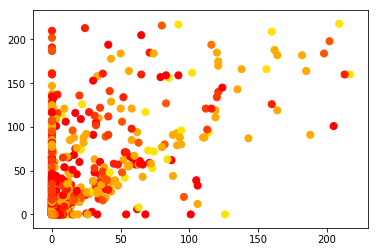

In [75]:
for i in range(0,8):
        plt.scatter(X[:, i], X[:, i+1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

 <font size="+2">*Pour cette fois les données encoder ont donné de meilleurs résultats pour 2 raison :
    1/car plus le log likelihood est supèrieur meilleur est le model 
    2/ plus la perplexity est petite plus notre model est performant *</font>